In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.tools.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
#read the data
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)


In [4]:
names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape',' marginal_adhesion','single_epithelial_cell_size',
        'bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']

In [5]:
data= pd.read_csv(url,names=names)

In [6]:
data

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [7]:
#droppping id column

data.drop('id',axis=1,inplace=True)

In [8]:
data.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [9]:
# Check if any NA exists
data.isnull().values.any()

False

In [10]:
data.replace("?",-9999,inplace=True)

In [11]:
#Check for outliers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null int64
uniformity_of_cell_size        699 non-null int64
uniformity_of_cell_shape       699 non-null int64
 marginal_adhesion             699 non-null int64
single_epithelial_cell_size    699 non-null int64
bare_nuclei                    699 non-null object
bland_chromatin                699 non-null int64
normal_nucleoli                699 non-null int64
mitoses                        699 non-null int64
class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [12]:
data.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
data.axes

[RangeIndex(start=0, stop=699, step=1),
 Index(['clump_thickness', 'uniformity_of_cell_size',
        'uniformity_of_cell_shape', ' marginal_adhesion',
        'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
        'normal_nucleoli', 'mitoses', 'class'],
       dtype='object')]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1177fa6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b7a3c18>]], dtype=object)

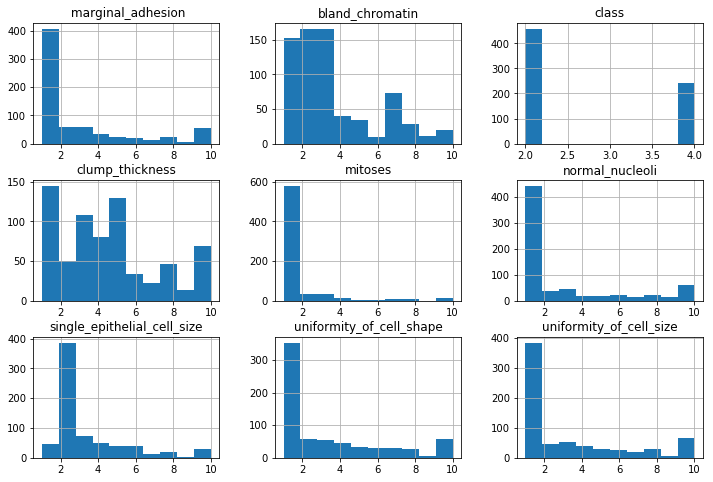

In [14]:
# Visualization

data.hist(figsize=(12,8))

In [ ]:
#Normalizing Numerical Features

In [15]:
#convert obj dtype to int
data['bare_nuclei']=pd.to_numeric(data['bare_nuclei'])

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:

scaler = MinMaxScaler()

In [18]:
rescaled_data=scaler.fit_transform(data)
rescaled_data

array([[ 0.44444444,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44444444,  0.33333333,  0.33333333, ...,  0.11111111,
         0.        ,  0.        ],
       [ 0.22222222,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.44444444,  1.        ,  1.        , ...,  1.        ,
         0.11111111,  1.        ],
       [ 0.33333333,  0.77777778,  0.55555556, ...,  0.55555556,
         0.        ,  1.        ],
       [ 0.33333333,  0.77777778,  0.77777778, ...,  0.33333333,
         0.        ,  1.        ]])

In [19]:
scaled_data = pd.DataFrame(rescaled_data, columns=['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape',' marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115208f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115a21208>]], dtype=object)

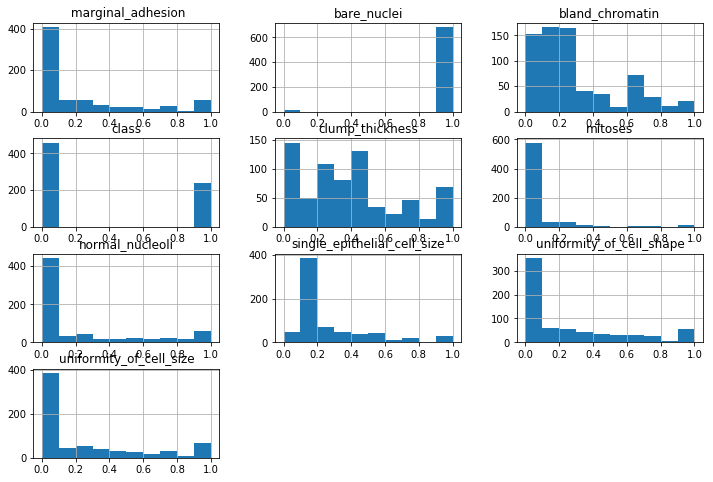

In [75]:
scaled_data.hist(figsize=(12,8))

In [20]:
#checking scaled dataframe
scaled_data

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.999101,0.222222,0.000000,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.999201,0.222222,0.000000,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.999401,0.222222,0.666667,0.000000,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.999101,0.222222,0.000000,0.000000,0.0
5,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,0.000000,1.0
6,0.000000,0.000000,0.000000,0.000000,0.111111,1.000000,0.222222,0.000000,0.000000,0.0
7,0.111111,0.000000,0.111111,0.000000,0.111111,0.999101,0.222222,0.000000,0.000000,0.0
8,0.111111,0.000000,0.000000,0.000000,0.111111,0.999101,0.000000,0.000000,0.444444,0.0
9,0.333333,0.111111,0.000000,0.000000,0.111111,0.999101,0.111111,0.000000,0.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c8d1978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f3e6fd0>]], dtype=object)

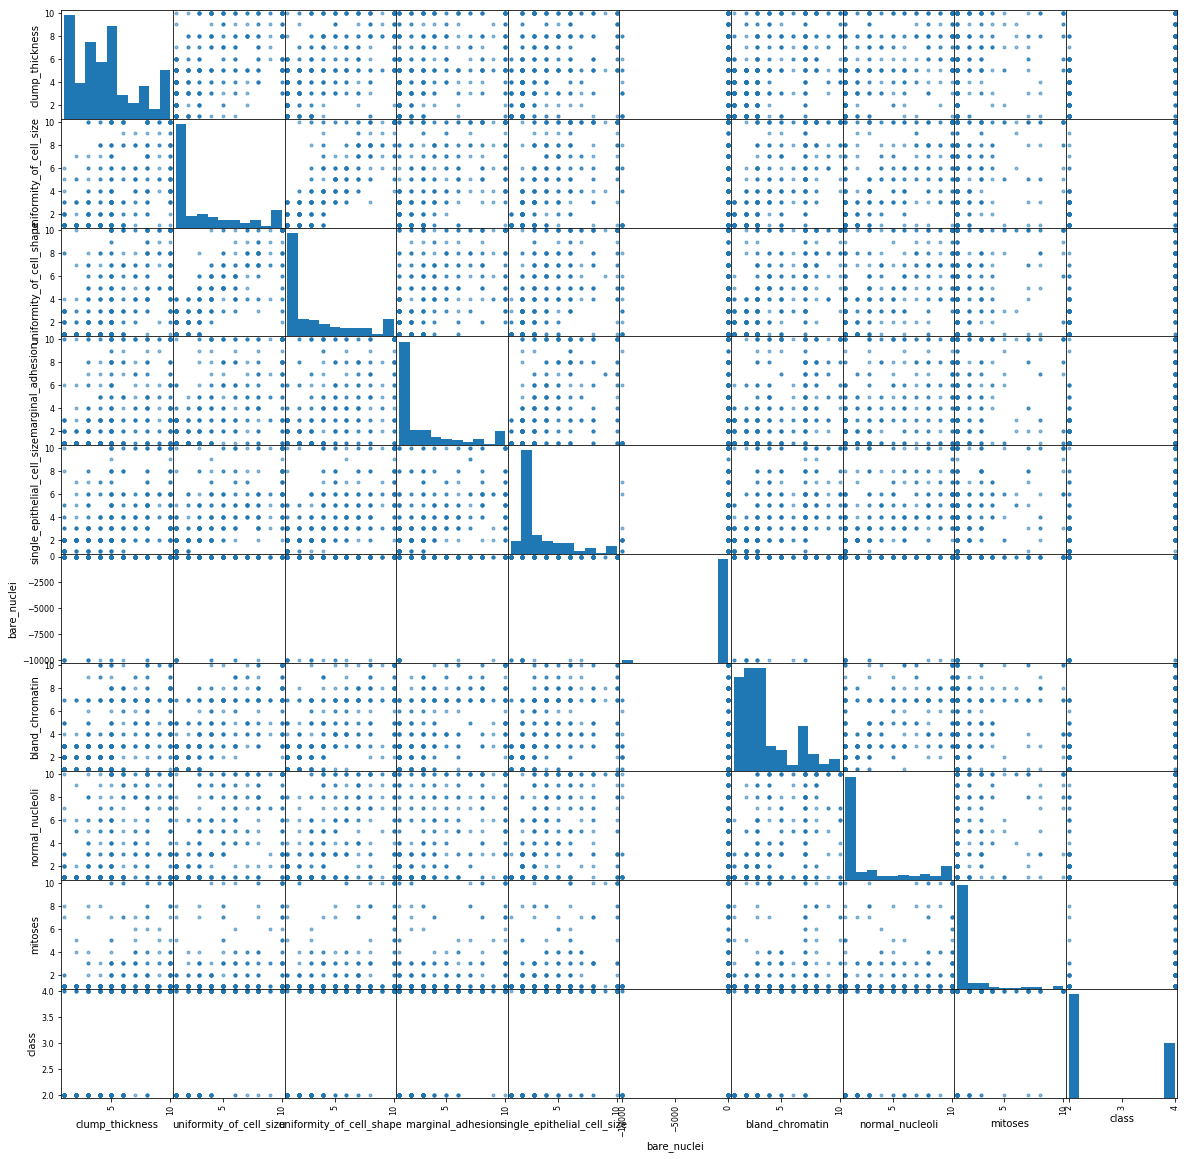

In [80]:
scatter_matrix(data,figsize=(20,20))
#shows no specifc linear relationship

In [81]:
# Training Machine learning algorithm

In [21]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                699 non-null float64
uniformity_of_cell_size        699 non-null float64
uniformity_of_cell_shape       699 non-null float64
 marginal_adhesion             699 non-null float64
single_epithelial_cell_size    699 non-null float64
bare_nuclei                    699 non-null float64
bland_chromatin                699 non-null float64
normal_nucleoli                699 non-null float64
mitoses                        699 non-null float64
class                          699 non-null float64
dtypes: float64(10)
memory usage: 54.7 KB


In [22]:
scaled_data['class'] = scaled_data['class'].astype('int')

In [23]:
scaled_data

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.999101,0.222222,0.000000,0.000000,0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.999201,0.222222,0.000000,0.000000,0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.999401,0.222222,0.666667,0.000000,0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.999101,0.222222,0.000000,0.000000,0
5,0.777778,1.000000,1.000000,0.777778,0.666667,1.000000,0.888889,0.666667,0.000000,1
6,0.000000,0.000000,0.000000,0.000000,0.111111,1.000000,0.222222,0.000000,0.000000,0
7,0.111111,0.000000,0.111111,0.000000,0.111111,0.999101,0.222222,0.000000,0.000000,0
8,0.111111,0.000000,0.000000,0.000000,0.111111,0.999101,0.000000,0.000000,0.444444,0
9,0.333333,0.111111,0.000000,0.000000,0.111111,0.999101,0.111111,0.000000,0.000000,0


In [24]:

#define X
X= np.array(scaled_data.drop(['class'],axis=1))

In [25]:
# define y
y= np.array(scaled_data['class'])

### Train Test split

In [27]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [28]:
model=LogisticRegression()

In [29]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
model.score(X_train,y_train)

0.95299145299145294

In [33]:
predicted= model.predict(X_test)
predicted

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1])

In [47]:
X_train.shape

(468, 9)

In [48]:
y_train.shape

(468,)

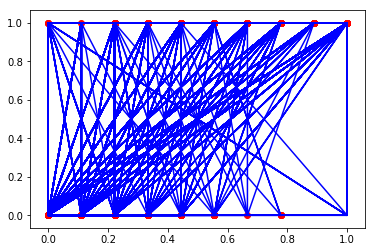

In [54]:
# Visualising the Training set results
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')


#### Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
print(confusion_matrix(y_test,predicted))

[[151   3]
 [  4  73]]


#### Accuracy score

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,predicted)

0.96969696969696972

## SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svc= SVC(kernel='linear')

In [40]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
svc.score(X_train,y_train)

0.96581196581196582

In [43]:
predicted1= svc.predict(X_test)
predicted1

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1])

In [44]:
print(confusion_matrix(y_test,predicted1))

[[150   4]
 [  4  73]]


In [45]:
accuracy_score(y_test,predicted1)

0.96536796536796532

## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtmode= DecisionTreeClassifier()

In [57]:
dtmode.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
predicted2= dtmode.predict(X_test)
predicted2

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1])

In [59]:
accuracy_score(y_test,predicted2)

0.93506493506493504